In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
from biotsavart import *

In [4]:
lp = Loop.square(1)
r_obs = ObsPoint(x=0.75, y=0.25, z=-0.5)

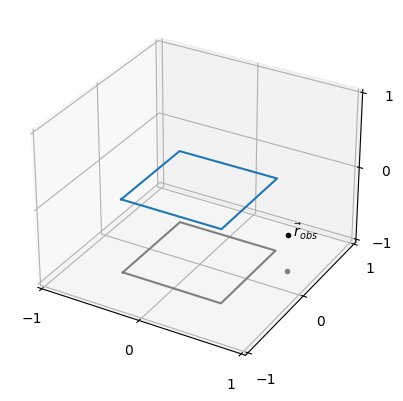

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(lp.x, lp.y, lp.z)
ax.plot(lp.x, lp.y, -np.ones_like(lp.z), 'gray')

ax.plot(*r_obs.xyz, 'k.')
ax.plot(r_obs.x, r_obs.y, -1, '.', color='gray')

ax.text(r_obs.x+0.05, r_obs.y, r_obs.z, '$\\vec r_{obs}$')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1]);


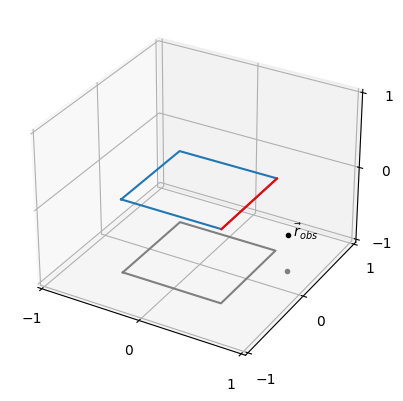

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(lp.x, lp.y, lp.z)
ax.plot(lp.x[1:3], lp.y[1:3], lp.z[1:3], 'r')
ax.plot(lp.x, lp.y, -np.ones_like(lp.z), 'gray')

ax.plot(*r_obs.xyz, 'k.')
ax.plot(r_obs.x, r_obs.y, -1, '.', color='gray')

ax.text(r_obs.x+0.05, r_obs.y, r_obs.z, '$\\vec r_{obs}$')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1]);

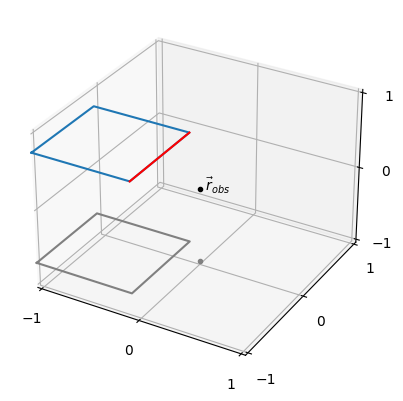

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(lp.x-r_obs.x, lp.y-r_obs.y, lp.z-r_obs.z)
ax.plot(lp.x[1:3]-r_obs.x, lp.y[1:3]-r_obs.y, lp.z[1:3]-r_obs.z, 'r')
ax.plot(lp.x-r_obs.x, lp.y-r_obs.y, -np.ones_like(lp.z), 'gray')

origin = ObsPoint()

ax.plot(*origin.xyz, 'k.')
ax.plot(origin.x, origin.y, -1, '.', color='gray')

ax.text(origin.x+0.05, origin.y, origin.z, '$\\vec r_{obs}$')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1]);

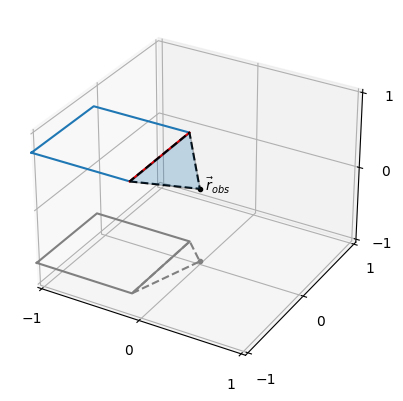

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


tr_lp = Loop.square(1)
tr_lp.x += -r_obs.x
tr_lp.y += -r_obs.y
tr_lp.z += -r_obs.z

ax.plot(tr_lp.x, tr_lp.y, tr_lp.z)
ax.plot(tr_lp.x[1:3], tr_lp.y[1:3], tr_lp.z[1:3], 'r')
ax.plot(tr_lp.x, tr_lp.y, -np.ones_like(tr_lp.z), 'gray')

tri = Loop(np.insert(tr_lp.x[1:3],1,0),
                         np.insert(tr_lp.y[1:3],1,0),
                         np.insert(tr_lp.z[1:3],1,0))
tri.x = np.append(tri.x,tri.x[0])
tri.y = np.append(tri.y,tri.y[0])
tri.z = np.append(tri.z,tri.z[0])


tri_vert = tri.xyz
tri_face = Poly3DCollection([tri_vert], alpha=0.25, edgecolor='k')
ax.add_collection3d(tri_face)


ax.plot(tri.x, tri.y, tri.z, 'k--')
ax.plot(tri.x, tri.y, -1*np.ones(4), '--', color='gray')

origin = ObsPoint()

ax.plot(*origin.xyz, 'k.')
ax.plot(origin.x, origin.y, -1, '.', color='gray')

ax.text(origin.x+0.05, origin.y, origin.z, '$\\vec r_{obs}$')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1]);

In [38]:
P = tr_lp.xyz[1]
Q = tr_lp.xyz[2]
nhat = np.cross(P,Q, axis=-1)
nhat /= np.linalg.norm(nhat, axis=-1)
nhat *= -0.5

R,iR = getR(P[None,:],Q[None,:])

In [42]:
Rxyz = np.einsum('...ij,...j->...i', R, tri.xyz)

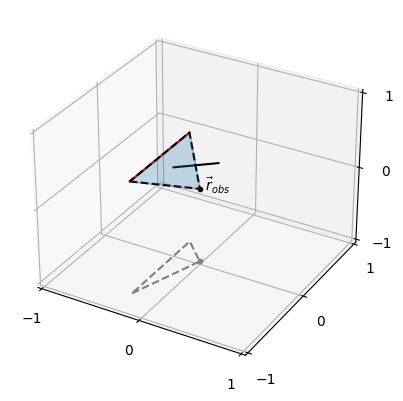

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


tr_lp = Loop.square(1)
tr_lp.x += -r_obs.x
tr_lp.y += -r_obs.y
tr_lp.z += -r_obs.z

# ax.plot(tr_lp.x, tr_lp.y, tr_lp.z)
ax.plot(tr_lp.x[1:3], tr_lp.y[1:3], tr_lp.z[1:3], 'r')
# ax.plot(tr_lp.x, tr_lp.y, -np.ones_like(tr_lp.z), 'gray')

tri = Loop(np.insert(tr_lp.x[1:3],1,0),
                         np.insert(tr_lp.y[1:3],1,0),
                         np.insert(tr_lp.z[1:3],1,0))
cnt = tri.xyz.mean(0)

tri.x = np.append(tri.x,tri.x[0])
tri.y = np.append(tri.y,tri.y[0])
tri.z = np.append(tri.z,tri.z[0])


tri_vert = tri.xyz
tri_face = Poly3DCollection([tri_vert], alpha=0.25, edgecolor='k')
ax.add_collection3d(tri_face)


ax.plot(tri.x, tri.y, tri.z, 'k--')
ax.plot(tri.x, tri.y, -1*np.ones(4), '--', color='gray')

origin = ObsPoint()

ax.plot(*origin.xyz, 'k.')
ax.plot(origin.x, origin.y, -1, '.', color='gray')

nhatv = np.zeros((2,)+nhat.shape)
nhatv[:] += cnt
nhatv[1] += nhat

ax.plot(nhatv[:,0], nhatv[:,1], nhatv[:,2], 'k-')



ax.text(origin.x+0.05, origin.y, origin.z, '$\\vec r_{obs}$')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1]);

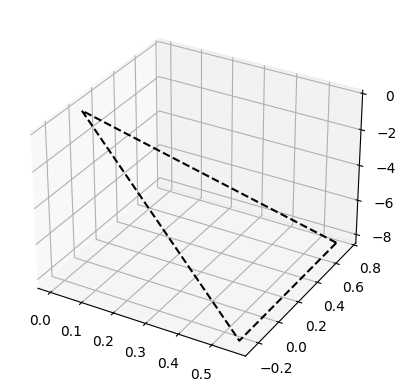

In [49]:
P = tr_lp.xyz[1]
Q = tr_lp.xyz[2]
nhat = np.cross(P,Q, axis=-1)
nhat /= np.linalg.norm(nhat, axis=-1)
nhat *= -0.5

R,iR = getR(P[None,:],Q[None,:])

R1 = np.zeros((len(tri.x),3,3))
R1[:] = iR
Rxyz = np.einsum('...ij,...j->...i', R1, tri.xyz)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Rxyz[:, 0], Rxyz[:, 1], Rxyz[:, 2], 'k--')